In [2]:
import heartpy as hp
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import math
import pylab


In [3]:
from heartpy.datautils import rolling_mean, _sliding_window
from datetime import datetime
from scipy.signal import find_peaks
from math import sin, isnan


In [4]:
df = pd.read_csv('data.csv') 

In [5]:
#datacleaning
#Checking for missing values
df.isnull().sum()
df= df.dropna()


In [5]:
df.keys()


Index(['HeartRate'], dtype='object')

In [50]:
#plt.title("Heart Rate Signal") #The title of our plot
#plt.plot(df.Temperature) #Draw the plot object
#plt.show()

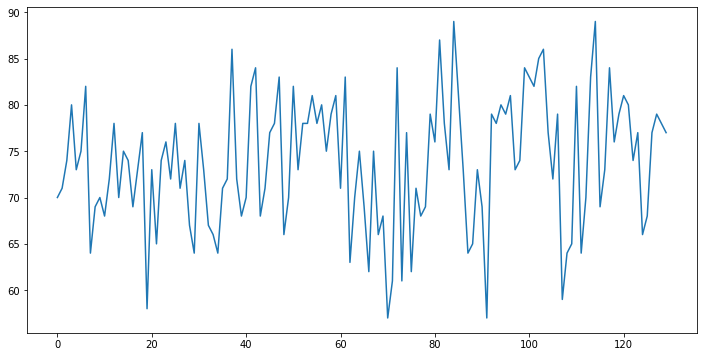

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['HeartRate'].values)
plt.show()

In [7]:
heart = hp.get_data("timeheart.csv")


In [8]:
def detectSuddenRise(array, lookback = 5, pool = 40, fs= 70):
    list = array[-lookback]
    sum = 0
    
    "Calculate average for the lookback"
    for a in list:
        sum = sum + a
    
    poolList = array[-lookback:-pool]
    poolSum = 0
 
    "Calculate average for the larger pool"
    for b in poolList:
        poolSum = poolSum + b
    
    poolAvg = poolSum / pool
    listAvg = sum / lookback
 
    "Return whether the past 5 records has some form of spike"
    return (listAvg - poolAvg) > fs



In [9]:
detectSuddenRise(heart)

False

In [46]:
# maximum temperature
tempdata = pd.read_csv('temperature.csv') 
#tempdata= pd.DataFrame({'Temperature': temperature})
df.agg( \
    min_temp=('Temperature', 'min'),
    max_temp=('Temperature', 'max')) \
  .reset_index() \
  .to_dict('records')

[{'index': 'min_temp', 'Temperature': 96.3},
 {'index': 'max_temp', 'Temperature': 100.8}]

In [ ]:
# hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
# fs = 70 #The example dataset was recorded at 100Hz
# mov_avg = df['Temperature'].rolling(int(hrw*fs)).mean() #Calculate moving average
# #Impute where moving average function returns NaN, which is the beginning of the signal where x hrw
# avg_hr = (np.mean(df.Temperature))
# mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
# mov_avg = [x*1.2 for x in mov_avg] #For now we raise the average by 20% to prevent the secondary heart contraction from interfering, in part 2 we will do this dynamically
# df['Temperature_rollingmean'] = mov_avg #Append the moving average to the dataframe

# #Mark regions of interest
# window = []
# peaklist = [90,129]
# listpos = 260 #We use a counter to move over the different data columns

# for datapoint in df.Temperature:
#     rollingmean = df.Temperature_rollingmean[listpos] #Get local mean
#     if (datapoint < rollingmean) and (len(window) < 1): #If no detectable R-complex activity -> do nothing
#         listpos += 1
#     elif (datapoint > rollingmean): #If signal comes above local mean, mark ROI
#         window.append(datapoint)
#         listpos += 1
#     else: #If signal drops below local mean -> determine highest point
#         maximum = max(window)
#         beatposition = listpos - len(window) + (window.index(max(window))) #Notate the position of the point on the X-axis
#         peaklist.append(beatposition) #Add detected peak to list
#         window = [] #Clear marked ROI
#         listpos += 1

# ybeat = [df.Temperature[x] for x in peaklist] #Get the y-value of all peaks for plotting purposes
# plt.title("Detected peaks in signal")
# plt.xlim(0,2500)
# plt.plot(df.Temperature, alpha=0.5, color='blue') #Plot semi-transparent HR
# plt.plot(mov_avg, color ='green') #Plot moving average
# plt.scatter(peaklist, ybeat, color='red') #Plot detected peaks
# plt.show()